# Security Features

Security in Python ensures that applications protect **sensitive data**, prevent *unauthorized access*, and maintain ***trust***. Without proper security measures, systems can be exploited, leading to data breaches, financial loss, and reputational damage.

## Encryption

- Encryption is a process which transforms the original information into an unrecognizable form. 
- This new form of the message is entirely different from the original message. 
- That’s why a hacker is not able to read the data, as senders use an encryption algorithm

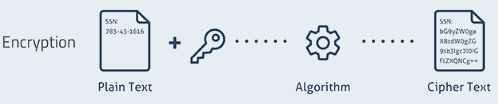

## Decryption

- Decryption is the process of converting encoded/encrypted data into a form that is readable and understood by a human or a computer. This method is performed by un-encrypting the text manually or by using keys used to encrypt the original data.

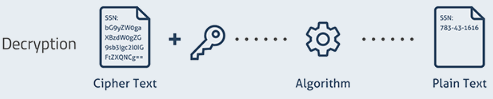

package name:

		pip install cryptography

### Types of Encryption:
	
	- 
	- hello

In [ ]:
from cryptography.fernet import Fernet

# Generate key (do this once and save it)
key = Fernet.generate_key()
print("Key:", key)

# Create cipher
cipher = Fernet(key)
# Ciphertext = AES-CBC(key, IV, plaintext)

# Message
text = "Hello Naveen"
text = text.encode()
print(text)

# Encrypt
encrypted = cipher.encrypt(text)
print("Encrypted:", encrypted)

# Decrypt
# decrypted = cipher.decrypt(encrypted)
# print("Decrypted:", decrypted.decode())

In [ ]:
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding


# ----------------------------
# Generate Secret Key (AES-128)
# ----------------------------
key = os.urandom(16)   # 16 bytes = 128-bit key
print("Secret Key:", key)


# ----------------------------
# Generate IV (16 bytes)
# ----------------------------
iv = os.urando m(16)
print("IV:", iv)


# ----------------------------
# Message
# ----------------------------
message = "Hello, this is secret data"
print("Original:", message)


# Convert string → bytes
data = message.encode("utf-8")


# ----------------------------
# Padding (AES needs 16-byte blocks)
# ----------------------------
padder = padding.PKCS7(128).padder()
padded_data = padder.update(data) + padder.finalize()


# ----------------------------
# Create AES-CBC Cipher
# ----------------------------
cipher = Cipher(
    algorithms.AES(key),
    modes.CBC(iv),
    backend=default_backend()
)


# ----------------------------
# Encrypt
# ----------------------------
encryptor = cipher.encryptor()
ciphertext = encryptor.update(padded_data) + encryptor.finalize()

print("Ciphertext:", ciphertext)


# ----------------------------
# Decrypt
# ----------------------------
decryptor = cipher.decryptor()
decrypted_padded = decryptor.update(ciphertext) + decryptor.finalize()


# ----------------------------
# Remove Padding
# ----------------------------
unpadder = padding.PKCS7(128).unpadder()
decrypted = unpadder.update(decrypted_padded) + unpadder.finalize()


# Convert bytes → string
final_text = decrypted.decode("utf-8")

print("Decrypted:", final_text) 




Rsa

In [ ]:
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes


# -------------------------------
# Generate Keys (In Memory)
# -------------------------------
def generate_keys():
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048
    )
    public_key = private_key.public_key()

    return private_key, public_key


# -------------------------------
# Encrypt
# -------------------------------
def encrypt_message(public_key, message: str) -> bytes:
    encrypted = public_key.encrypt(
        message.encode("utf-8"),
        padding.OAEP(
            mgf=padding.MGF1(hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return encrypted


# -------------------------------
# Decrypt
# -------------------------------
def decrypt_message(private_key, encrypted: bytes) -> str:
    decrypted = private_key.decrypt(
        encrypted,
        padding.OAEP(
            mgf=padding.MGF1(hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return decrypted.decode("utf-8")


# -------------------------------
# MAIN
# -------------------------------
if __name__ == "__main__":

    # Generate keys
    private_key, public_key = generate_keys()

    msg = "Hello Naveen, RSA in-memory demo"

    print("Original:", msg)

    # Encrypt
    cipher = encrypt_message(public_key, msg)
    print("\nEncrypted:", cipher)

    # Decrypt
    plain = decrypt_message(private_key, cipher)
    print("\nDecrypted:", plain)


Sql injection

In [ ]:
username = input("Enter username: ")
password = input("Enter password: ")

query = f"""
SELECT * FROM users
WHERE username = '{username}'
AND password = '{password}'
"""

In [ ]:
username: naveen
password: 1234

# SELECT * FROM users
# WHERE username = 'naveen'
# AND password = '1234'

In [ ]:
username: admin
password: ' OR '1'='1


# SELECT * FROM users
# WHERE username = 'admin'
# AND password = '' OR '1'='1'






username: admin'; DROP TABLE users; --



# SELECT * FROM users
# WHERE username = 'admin'; DROP TABLE users; --'


In [ ]:
Format string

query = "SELECT * FROM users WHERE username = %s   AND password = %s"

cursor.execute(query, (username, password))



using orm


# user = session.query(User).filter_by(
#     username=username,
#     password=password
# ).first()



Add validation 

In [ ]:
bank/pay/to= "" amount = ""